# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
#print out current directory
os.getcwd()

'C:\\Users\\thoma\\projects\\datascience\\capstone-01\\notebooks'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model. Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Import Cleaned Data

In [2]:
path = 'C:\\Users\\thoma\\projects\\datascience\\capstone-01\\data\\processed'
os.chdir(path)

df = pd.read_csv('step3_output.csv')

#### Drop Weekday Prices
Weekday and weekend prices are both response variables with high correlation, so one must be dropped to model the other.

In [3]:
df.drop('AdultWeekday', axis=1, inplace=True)

#### Duplicate dataframe for prediction and recommendations

In [4]:
predict = df.copy()
recommend = df.copy()

## <font color='teal'>Price Prediction Model</font>
Model to predict ticket prices based upon alterable qualities and inherent mountain features.

#### Create Dummy Features for Categorical Variables
State is a categorical variable, so dummy variables will need to be created to allow modelling.

In [5]:
dfo=predict[['state']] # select state column

predict = pd.concat([predict.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1) # generate dummy columns and then drop state categorical column

#### Standardize the magnitude of numeric features

In [6]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X_pred = predict.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y_pred = predict.loc[:,'AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler_pred = preprocessing.StandardScaler().fit(X_pred)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled_pred = scaler_pred.transform(X_pred)

#### Flatten response variable

In [7]:
y_pred = y_pred.ravel()

#### Split into training and test datasets

In [8]:
X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(X_scaled_pred, y_pred, test_size=0.25, random_state=1)

#### Fit model with training dataset

In [9]:
lm_pred = linear_model.LinearRegression()
predict_model = lm_pred.fit(X_train_pred,y_train_pred)

#### Check Model

In [10]:
y_check_pred = predict_model.predict(X_test_pred)

In [11]:
explained_variance_score(y_test_pred, y_check_pred)

0.3662666865074793

In [12]:
mean_absolute_error(y_test_pred, y_check_pred)

13.763082588095843

States should be top 10 coefficients

In [13]:
pd.DataFrame(abs(lm_pred.coef_), X_pred.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False).head(10)

,Coefficient
state_New York,3.168573e+13
state_Michigan,2.990272e+13
state_Colorado,2.634603e+13
state_California,2.578205e+13
state_Pennsylvania,2.460285e+13
state_New Hampshire,2.268576e+13
state_Wisconsin,2.268576e+13
state_Vermont,2.200034e+13
state_Minnesota,2.128806e+13
state_Utah,2.054612e+13


## <font color='teal'>Management Recommendations</font>
Management reccomendations for alterations that would allow ticket price increases.

#### Drop features that cannot be changed
In this model, we are studying alterable features that will allow for future price increases, so features are difficult to change from a management perspective must be dropped.

In [14]:
recommend = recommend.drop(['state','summit_elev','vertical_drop','averageSnowfall','yearsOpen','daysOpenLastYear','projectedDaysOpen'], axis=1)
recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   trams              330 non-null    int64  
 2   fastEight          330 non-null    int64  
 3   fastSixes          330 non-null    int64  
 4   fastQuads          330 non-null    int64  
 5   quad               330 non-null    int64  
 6   triple             330 non-null    int64  
 7   double             330 non-null    int64  
 8   surface            330 non-null    int64  
 9   total_chairs       330 non-null    int64  
 10  Runs               330 non-null    int64  
 11  TerrainParks       330 non-null    int64  
 12  LongestRun_mi      330 non-null    float64
 13  SkiableTerrain_ac  330 non-null    float64
 14  Snow Making_ac     330 non-null    float64
 15  AdultWeekend       330 non-null    float64
 16  NightSkiing_ac     330 non

#### Standardize the magnitude of numeric features

In [15]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X_rec = recommend.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y_rec = recommend.loc[:,'AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler_rec = preprocessing.StandardScaler().fit(X_rec)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled_rec = scaler_rec.transform(X_rec)

#### Flatten Response Variable

In [16]:
y_rec = y_rec.ravel()

#### Split into training and test datasets

In [17]:
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X_scaled_rec, y_rec, test_size=0.25, random_state=1)

#### Fit model with training dataset

In [18]:
lm_rec = linear_model.LinearRegression()
recommend_model = lm_rec.fit(X_train_rec,y_train_rec)

#### Print coefficient weights
Higher weighted coefficients affect ticket prices more, so if management would like to increase ticket price long term, they must increase these metrics.

In [19]:
pd.DataFrame(lm_rec.coef_, X_rec.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False).head(10)

,Coefficient
Snow Making_ac,8.491579
Runs,5.060119
fastQuads,3.783783
quad,3.329143
triple,2.551908
LongestRun_mi,2.127807
total_chairs,1.217728
SkiableTerrain_ac,0.798363
double,0.525715
clusters,-0.057747


## Review the results 

**<font color='teal'> Now, let's predict the Whitefish Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**
<br/><br/>**NOTE:** The resort is not called Big Mountain Resort, but instead Whitefish Mountain Ski Resort

In [20]:
predict[predict['Name'].str.contains('Big Mountain')]

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming


In [21]:
client = predict[predict['Name'].str.contains('Whitefish Mountain Resort')]
client

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
151,Whitefish Mountain Resort,6817,2353,0,0,0,3,2,6,0,...,0,0,0,0,0,0,0,0,0,0


**<font color='teal'> Prepare the Whitefish Mountain resort data row as you did in the model fitting stage.</font>**

In [22]:
X_client = client.drop(['Name','AdultWeekend'], axis=1)
X_scaled_client = scaler_pred.transform(X_client)

**<font color='teal'> Predict the Whitefish Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [23]:
ticket_pred = predict_model.predict(X_scaled_client)
print('Predicted Ticket Price: $' + "{:.2f}".format(ticket_pred[0]))

Predicted Ticket Price: $81.77


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [24]:
print('Actual Ticket Price: $' + "{:.2f}".format(client['AdultWeekend'].to_numpy()[0]))

Actual Ticket Price: $81.00


## <font color='teal'>Management Recommendations</font>

The table below displays the top two features that management can alter to justify weekend ticket price increases. I will modify them and then predict the new ticket price based upon those changes.

In [25]:
pd.DataFrame(lm_rec.coef_, X_rec.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False).head(2)

,Coefficient
Snow Making_ac,8.491579
Runs,5.060119


### <font color='teal'>Current Values for Top Features</font>

In [26]:
print('Current Snow Making Acerage: ' + "{:.0f}".format(client['Snow Making_ac'].to_numpy()[0]) + ' acres')

Current Snow Making Acerage: 600 acres


In [27]:
print('Current Number of Runs: ' + "{:.0f}".format(client['Runs'].to_numpy()[0]) + ' runs')

Current Number of Runs: 105 runs


### <font color='teal'>Ticket Predictions for Snow Making Acerage Increase</font>

#### Generate new dataframe with modified acerage

In [28]:
acres = pd.DataFrame(columns=client.columns)
row = client.copy()
o_acres = client.at[151,'Snow Making_ac']
for x in range(-100,610,10):
    row.at[151,'Snow Making_ac'] = o_acres + x
    acres = pd.concat([acres,row])
acres = acres.reset_index()
acres = acres.drop(['Name','AdultWeekend','index'], axis=1)
acres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   summit_elev           71 non-null     object 
 1   vertical_drop         71 non-null     object 
 2   trams                 71 non-null     object 
 3   fastEight             71 non-null     object 
 4   fastSixes             71 non-null     object 
 5   fastQuads             71 non-null     object 
 6   quad                  71 non-null     object 
 7   triple                71 non-null     object 
 8   double                71 non-null     object 
 9   surface               71 non-null     object 
 10  total_chairs          71 non-null     object 
 11  Runs                  71 non-null     object 
 12  TerrainParks          71 non-null     object 
 13  LongestRun_mi         71 non-null     float64
 14  SkiableTerrain_ac     71 non-null     float64
 15  Snow Making_ac        71 

#### Predict ticket price for each row

In [29]:
for index, row in acres.iterrows():
    X_scaled_acres = scaler_pred.transform(pd.DataFrame(row).T)
    ticket_pred = predict_model.predict(X_scaled_acres)
    acres.at[index,'ticketPred'] = ticket_pred[0]

#### Clean unnecessary rows

In [30]:
acres = acres[['Snow Making_ac','ticketPred']]
acres.head(10)

,Snow Making_ac,ticketPred
0,500.0,79.199566
1,510.0,79.457379
2,520.0,79.715191
3,530.0,79.973004
4,540.0,80.230816
5,550.0,80.488629
6,560.0,80.746441
7,570.0,80.996441
8,580.0,81.254254
9,590.0,81.512066


#### Export prediction dataframe

In [31]:
# Write dataframe to csv 
path="C:\\Users\\thoma\\projects\\datascience\\capstone-01\\data\\output\\snow_making_increase.csv"
acres.to_csv(path, index=False)
print('Done!')

Done!


### <font color='teal'>Ticket Predictions for Run Increase</font>

#### Generate new dataframe with modified number of runs

In [32]:
runs = pd.DataFrame(columns=client.columns)
row = client.copy()
o_runs = client.at[151,'Runs']
for x in range(-10,50,1):
    row.at[151,'Runs'] = o_runs + x
    runs = pd.concat([runs,row])
runs = runs.reset_index()
runs = runs.drop(['Name','AdultWeekend','index'], axis=1)
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   summit_elev           60 non-null     object 
 1   vertical_drop         60 non-null     object 
 2   trams                 60 non-null     object 
 3   fastEight             60 non-null     object 
 4   fastSixes             60 non-null     object 
 5   fastQuads             60 non-null     object 
 6   quad                  60 non-null     object 
 7   triple                60 non-null     object 
 8   double                60 non-null     object 
 9   surface               60 non-null     object 
 10  total_chairs          60 non-null     object 
 11  Runs                  60 non-null     object 
 12  TerrainParks          60 non-null     object 
 13  LongestRun_mi         60 non-null     float64
 14  SkiableTerrain_ac     60 non-null     float64
 15  Snow Making_ac        60 

#### Predict ticket price for each row

In [33]:
for index, row in runs.iterrows():
    X_scaled_runs = scaler_pred.transform(pd.DataFrame(row).T)
    ticket_pred = predict_model.predict(X_scaled_runs)
    runs.at[index,'ticketPred'] = ticket_pred[0]

#### Clean unnecessary rows

In [34]:
runs = runs[['Runs','ticketPred']]
runs.head(10)

,Runs,ticketPred
0,95,81.223004
1,96,81.277691
2,97,81.332379
3,98,81.387066
4,99,81.441754
5,100,81.496441
6,101,81.551129
7,102,81.605816
8,103,81.660504
9,104,81.715191


#### Export prediction dataframe

In [35]:
# Write dataframe to csv 
path="C:\\Users\\thoma\\projects\\datascience\\capstone-01\\data\\output\\runs_increase.csv"
runs.to_csv(path, index=False)
print('Done!')

Done!


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

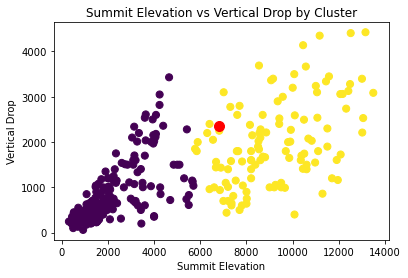

In [36]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(row['summit_elev'], row['vertical_drop'], c='red', s=100)
plt.xlabel('Summit Elevation')
plt.ylabel('Vertical Drop')
plt.title('Summit Elevation vs Vertical Drop by Cluster')

path = 'C:\\Users\\thoma\\projects\\datascience\\capstone-01\\figures\\fig1.png'
plt.savefig(path,bbox_inches='tight')

#### <font color='teal'>Snow Making Acerage Increase</font>

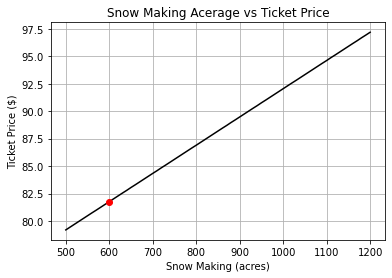

In [37]:
plt.plot(acres['Snow Making_ac'], acres['ticketPred'],'k')
plt.plot(acres[acres['Snow Making_ac'] == 600]['Snow Making_ac'], acres[acres['Snow Making_ac'] == 600]['ticketPred'],'ro')
plt.xlabel('Snow Making (acres)')
plt.ylabel('Ticket Price ($)')
plt.grid()
plt.title('Snow Making Acerage vs Ticket Price')


path = 'C:\\Users\\thoma\\projects\\datascience\\capstone-01\\figures\\fig2.png'
plt.savefig(path,bbox_inches='tight')

#### <font color='teal'>Runs Increase</font>

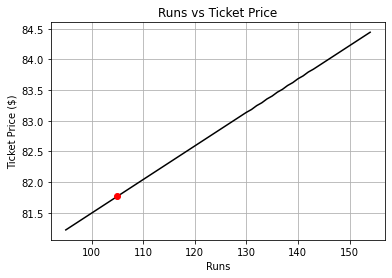

In [38]:
plt.plot(runs['Runs'], runs['ticketPred'],'k')
plt.plot(runs[runs['Runs'] == 105]['Runs'], runs[runs['Runs'] == 105]['ticketPred'],'ro')
plt.xlabel('Runs')
plt.ylabel('Ticket Price ($)')
plt.grid()
plt.title('Runs vs Ticket Price')

path = 'C:\\Users\\thoma\\projects\\datascience\\capstone-01\\figures\\fig3.png'
plt.savefig(path,bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [39]:
import pickle
s = pickle.dumps(predict_model)
from joblib import dump, load
path = 'C:\\Users\\thoma\\projects\\datascience\\capstone-01\\models\\regression_model_adultweekend.joblib'
dump(predict_model, path)

['C:\\Users\\thoma\\projects\\datascience\\capstone-01\\models\\regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [40]:
metrics = pd.DataFrame(lm_pred.coef_, X_pred.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False).T
metrics = metrics.add_prefix('coefficient_')
metrics['explained_variance'] = explained_variance_score(y_test_pred, y_check_pred)
metrics['mean_absolute_error'] = mean_absolute_error(y_test_pred, y_check_pred)
metrics['intercept'] = lm_pred.intercept_

In [41]:
# Write your dataframe to csv 
path="C:\\Users\\thoma\\projects\\datascience\\capstone-01\\data\\output\\model_metrics.csv"
df.to_csv(path, index=False)
print('Done!')

Done!
